In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn import metrics
from matplotlib.colors import ListedColormap

### Iris Dataset

In [2]:
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
df=pd.read_csv("iris.csv",names = col_names) 
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = df.values[:,:-1]
Y = df.values[:,-1]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Encode the class labels

In [4]:
le = LabelEncoder()
y = le.fit_transform(Y)

#### Split the dataset into train and test sets. Keep 20% of data for testing and the rest will be training data. 

In [5]:
X_two = X[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X_two, y,stratify=y, test_size = 0.2, random_state = 32)
X_two

array([[5.1, 3.5],
       [4.9, 3.0],
       [4.7, 3.2],
       [4.6, 3.1],
       [5.0, 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5.0, 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3.0],
       [4.3, 3.0],
       [5.8, 4.0],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5.0, 3.0],
       [5.0, 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5.0, 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3.0],
       [5.1, 3.4],
       [5.0, 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5.0, 3.5],
       [5.1, 3.8],
       [4.8, 3.0],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5.0, 3.3],
       [7.0, 3.2],
       [6.4, 3.2],
       [6.9,

### A.Compare all four features distribution in each iris class using boxplots

<Figure size 432x288 with 0 Axes>

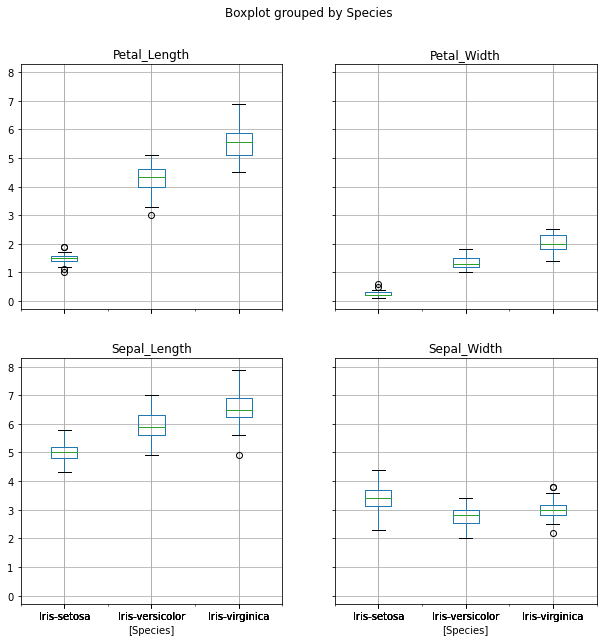

In [6]:
plt.figure()
df.boxplot(by="Species",figsize=(10,10))
plt.show()

#### Step1: Calculate the distance from test data ( Euclidean distance)
#### Step2: Find the set I of k observations with smallest distances
#### Step3: Assign a label by taking a majority vote on I

In [7]:
def euclidean(point_1, point_2):
    square = np.square(point_1 - point_2)
    sum_square = np.sum(square)
    distance = np.sqrt(sum_square)
    return distance

In [8]:
def KNN_Pred(x_train, y, x_input, k):
    list = []
    for x in x_input:
        point_dist = []
        for j in range(len(x_train)):
            c=np.array(x_train[j])
            distances = euclidean(c, x)
            point_dist.append(distances)
        point_dist = np.array(point_dist)
        dist = np.argsort(point_dist)[:k]
        labels = y[dist]
        lab = mode(labels)
        lab = lab.mode[0]
        list.append(lab)
    return list

In [9]:
ys_predict=KNN_Pred(X_train,y_train,X_test,1)
print(ys_predict)
print(metrics.classification_report(ys_predict, y_test))
print(metrics.confusion_matrix(y_test, ys_predict))

[2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      0.83      0.62         6
           2       0.90      0.64      0.75        14

    accuracy                           0.80        30
   macro avg       0.80      0.83      0.79        30
weighted avg       0.85      0.80      0.81        30

[[10  0  0]
 [ 0  5  5]
 [ 0  1  9]]


In [10]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

In [11]:
# Display the svm 
xx , yy = meshGrid(X_two[:,0], X_two[:,1], 0.01)
X_t=np.c_[xx.ravel(), yy.ravel()]
Z=KNN_Pred(X_train,y_train,X_t,1)

####  Plot the decision boundary 

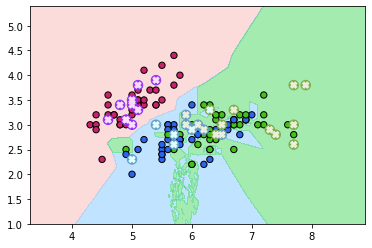

In [12]:
cmap_light = ListedColormap(['#FBBBB9','#82CAFF','#48d95e']) 
cmap_bold = ListedColormap(['#CA226B' ,'#2B65EC','#45bf19']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7','#80ad4c'])
cmap_predict = ListedColormap(['#FCDFFF','#E0FFFF','#eaf0da'])

Z=np.array(Z)
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1,2] ,alpha = 0.5)

# For plotting train and test and prediction separatley 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### With k=2

In [14]:
y_predict_2 = KNN_Pred(X_train,y_train,X_test,2)
print(y_predict_2)
print(metrics.classification_report(y_predict_2, y_test))
print(metrics.confusion_matrix(y_test, y_predict_2))

[2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.86      0.71         7
           2       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.86      0.83      0.84        30

[[10  0  0]
 [ 0  6  4]
 [ 0  1  9]]


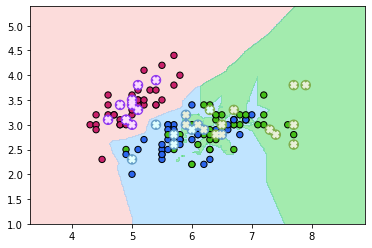

In [15]:
Z2=KNN_Pred(X_train,y_train,X_t,2)
Z2=np.array(Z2)
Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z2, cmap=cmap_light ,levels=[-1, 0, 1,2] ,alpha = 0.5)

# For plotting train and test and prediction separatley 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### With k = 4

In [17]:
y_predict_4 = KNN_Pred(X_train,y_train,X_test,4)
print(y_predict_4)
print(metrics.classification_report(y_predict_4, y_test))
print(metrics.confusion_matrix(y_test, y_predict_4))

[1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.86      0.71         7
           2       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.86      0.83      0.84        30

[[10  0  0]
 [ 0  6  4]
 [ 0  1  9]]


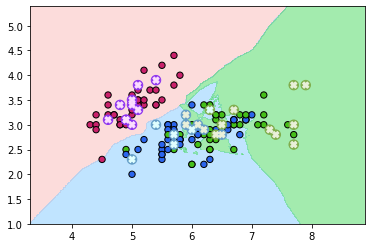

In [18]:
Z4=KNN_Pred(X_train,y_train,X_t,4)
Z4=np.array(Z4)
Z4 = Z4.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z4, cmap=cmap_light ,levels=[-1, 0, 1,2] ,alpha = 0.5)

# For plotting train and test and prediction separatley 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### With k = 6

In [19]:
y_predict_6 = KNN_Pred(X_train,y_train,X_test,6)
print(y_predict_6)
print(metrics.classification_report(y_predict_6, y_test))
print(metrics.confusion_matrix(y_test, y_predict_6))

[1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.88      0.78         8
           2       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.87      0.88      0.87        30
weighted avg       0.88      0.87      0.87        30

[[10  0  0]
 [ 0  7  3]
 [ 0  1  9]]


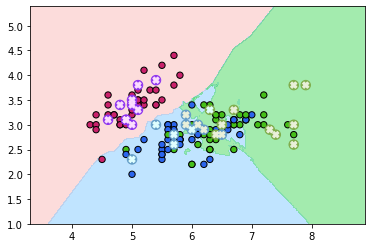

In [20]:
Z6=KNN_Pred(X_train,y_train,X_t,6)
Z6=np.array(Z6)
Z6 = Z6.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z6, cmap=cmap_light ,levels=[-1, 0, 1,2] ,alpha = 0.5)

# For plotting train and test and prediction separatley 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### With k=10

In [21]:
y_predict_10 = KNN_Pred(X_train,y_train,X_test,10)
print(y_predict_10)
print(metrics.classification_report(y_predict_10, y_test))
print(metrics.confusion_matrix(y_test, y_predict_10))

[2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      1.00      0.75         6
           2       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30

[[10  0  0]
 [ 0  6  4]
 [ 0  0 10]]


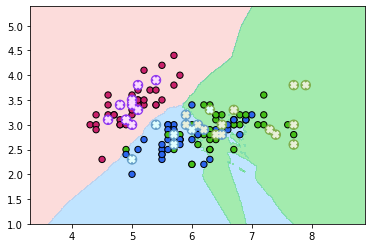

In [22]:
Z10=KNN_Pred(X_train,y_train,X_t,10)
Z10=np.array(Z10)
Z10 = Z10.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z10, cmap=cmap_light ,levels=[-1, 0, 1,2] ,alpha = 0.5)

# For plotting train and test and prediction separatley 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### How does the decision boundary change by increasing the number of neighbors?
By increasing the number of neighbors, the decision boundaries become much more smoother

## Bank Notes Dataset

In [23]:
col_names = ['Variance','Skewness','Kurtosis','Entropy','Class']
df2=pd.read_csv("data_banknote_authentication.csv",names = col_names) 
df2

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [24]:
Xbank = df2.values[:,:-1]
Ybank = df2.values[:,-1]

In [25]:
X_trainbank, X_testbank, y_trainbank, y_testbank = train_test_split(Xbank, Ybank,stratify=Ybank, test_size = 0.2, random_state = 40)

### Performing a 2-nearest neighbor on bank note dataset using 80% of the data as

In [26]:
ys_predictbank2=KNN_Pred(X_trainbank,y_trainbank,X_testbank,2)
print(ys_predictbank2)
print(metrics.classification_report(ys_predictbank2, y_testbank))
print(metrics.confusion_matrix(y_testbank, ys_predictbank2))

[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

### Using Manhattan Distance

In [27]:
def manhatten(p1, p2):
    dist = np.sum(np.abs(p1-p2))
    return dist

In [28]:
def KNN_Pred_Man(x_train, y, x_input, k):
    op = []
    for item in x_input:
        point_dist = []
        for j in range(len(x_train)):
            c=np.array(x_train[j])
            distances = manhatten(c, item)
            point_dist.append(distances)
        point_dist = np.array(point_dist)
        dist = np.argsort(point_dist)[:k]
        labels = y[dist]
        lab = mode(labels)
        lab = lab.mode[0]
        op.append(lab)
    return op

In [29]:
y_predict_Man = KNN_Pred_Man(X_trainbank,y_trainbank,X_testbank,2)
print(y_predict_Man)
print(metrics.classification_report(y_predict_Man, y_testbank))
print(metrics.confusion_matrix(y_testbank, y_predict_Man))

[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

### Using L3 (Minkowski formula for p = 3)

In [30]:
from decimal import Decimal
def p_root(value, root): 
    root_value = 1 / float(root) 
    return round (Decimal(value) **
             Decimal(root_value), 3)
def minkowski_distance(x, y, p): 
    return (p_root(sum(pow(abs(a-b), p) 
            for a, b in zip(x, y)), p))

In [31]:
def KNN_Pred_Minkow(x_train, y, x_input, k):
    op = []
    for item in x_input:
        point_dist = []
        for j in range(len(x_train)):           
            c=np.array(x_train[j])
            distances = minkowski_distance(c, item,3)
            point_dist.append(distances)
        point_dist = np.array(point_dist)
        dist = np.argsort(point_dist)[:k]
        labels = y[dist]
        lab = mode(labels)
        lab = lab.mode[0]
        op.append(lab)
    return op

In [32]:
y_predict_Minkow = KNN_Pred_Minkow(X_trainbank,y_trainbank,X_testbank,2)
print(y_predict_Minkow)
print(metrics.classification_report(y_predict_Minkow, y_testbank))
print(metrics.confusion_matrix(y_testbank, y_predict_Minkow))

[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

#### How does changing the distance function affect the classification?
The accuracy in all the classification is 100 percent. Therefore changing the distance function does not affect the classification

## 3. MNIST Dataset

In [51]:
df3_train = pd.read_csv("mnist_train.csv")
df3_test = pd.read_csv("mnist_test.csv")

### 1st the class label

### With 500 values

In [72]:
data = df3_train.values[:500]
data_test = df3_test.values[:500]
y_trainMnist500 = data[:, 0]
X_trainMnist500 = data[:,1:]

y_testMnist500 =  data_test[:,0]
X_testMnist500 = data_test[:,1:]

print(y_trainMnist500.shape, X_trainMnist500.shape)
print(X_testMnist500.shape, X_trainMnist500.shape)

(500,) (500, 784)
(500, 784) (500, 784)


In [80]:
ys_predict_MNIST500=KNN_Pred(X_trainMnist500,y_trainMnist500,X_testMnist500,1)
print(metrics.classification_report(ys_predict_MNIST500, y_testMnist500))
accuracy_500 = metrics.accuracy_score(ys_predict_MNIST500, y_testMnist500)
error_500 = 1- accuracy_500
print("Accuracy = ",accuracy_500)
print("Error = ",error_500)


              precision    recall  f1-score   support

           0       0.98      0.85      0.91        48
           1       1.00      0.81      0.89        83
           2       0.65      0.92      0.77        39
           3       0.83      0.78      0.80        49
           4       0.76      0.84      0.80        50
           5       0.62      0.79      0.70        39
           6       0.86      0.93      0.89        40
           7       0.75      0.78      0.77        46
           8       0.55      0.71      0.62        31
           9       0.87      0.63      0.73        75

    accuracy                           0.79       500
   macro avg       0.79      0.80      0.79       500
weighted avg       0.82      0.79      0.80       500

Accuracy =  0.794
Error =  0.20599999999999996


### With 1000 values

In [81]:
data = df3_train.values[:1000]
data_test = df3_test.values[:1000]
y_trainMnist1000 = data[:, 0]
X_trainMnist1000 = data[:,1:]

y_testMnist1000 =  data_test[:,0]
X_testMnist1000 = data_test[:,1:]

print(y_trainMnist1000.shape, X_trainMnist1000.shape)
print(X_testMnist1000.shape, X_trainMnist1000.shape)

(1000,) (1000, 784)
(1000, 784) (1000, 784)


In [82]:
ys_predict_MNIST1000=KNN_Pred(X_trainMnist1000,y_trainMnist1000,X_testMnist1000,1)
print(metrics.classification_report(ys_predict_MNIST1000, y_testMnist1000))
accuracy_1000 = metrics.accuracy_score(ys_predict_MNIST1000, y_testMnist1000)
error_1000 = 1- accuracy_1000
print("Accuracy = ",accuracy_1000)
print("Error = ",error_1000)


              precision    recall  f1-score   support

           0       0.94      0.88      0.91        91
           1       1.00      0.88      0.93       144
           2       0.79      0.92      0.85       100
           3       0.71      0.85      0.78        89
           4       0.72      0.87      0.79        91
           5       0.72      0.72      0.72        87
           6       0.93      0.84      0.89        96
           7       0.90      0.80      0.85       110
           8       0.65      0.88      0.75        66
           9       0.89      0.67      0.77       126

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.84      0.83      0.83      1000

Accuracy =  0.828
Error =  0.17200000000000004


### With 2500 values

In [83]:
data = df3_train.values[:2500]
data_test = df3_test.values[:2500]
y_trainMnist2500 = data[:, 0]
X_trainMnist2500 = data[:,1:]

y_testMnist2500 =  data_test[:,0]
X_testMnist2500 = data_test[:,1:]

print(y_trainMnist2500.shape, X_trainMnist2500.shape)
print(X_testMnist2500.shape, X_trainMnist2500.shape)

(2500,) (2500, 784)
(2500, 784) (2500, 784)


In [84]:
ys_predict_MNIST2500=KNN_Pred(X_trainMnist2500,y_trainMnist2500,X_testMnist2500,1)
print(metrics.classification_report(ys_predict_MNIST2500, y_testMnist2500))
accuracy_2500 = metrics.accuracy_score(ys_predict_MNIST2500, y_testMnist2500)
error_2500 = 1- accuracy_2500
print("Accuracy = ",accuracy_2500)
print("Error = ",error_2500)


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       232
           1       0.99      0.87      0.93       327
           2       0.83      0.95      0.89       242
           3       0.83      0.88      0.86       239
           4       0.87      0.89      0.88       269
           5       0.85      0.82      0.84       228
           6       0.95      0.88      0.91       241
           7       0.88      0.87      0.87       258
           8       0.75      0.90      0.82       203
           9       0.83      0.78      0.80       261

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.87      2500
weighted avg       0.88      0.88      0.88      2500

Accuracy =  0.876
Error =  0.124


### With 5000 values

In [85]:
data = df3_train.values[:5000]
data_test = df3_test.values[:5000]
y_trainMnist5000 = data[:, 0]
X_trainMnist5000 = data[:,1:]

y_testMnist5000 =  data_test[:,0]
X_testMnist5000 = data_test[:,1:]

print(y_trainMnist5000.shape, X_trainMnist5000.shape)
print(X_testMnist5000.shape, X_trainMnist5000.shape)

(5000,) (5000, 784)
(5000, 784) (5000, 784)


In [86]:
ys_predict_MNIST5000=KNN_Pred(X_trainMnist5000,y_trainMnist5000,X_testMnist5000,1)
print(metrics.classification_report(ys_predict_MNIST5000, y_testMnist5000))
accuracy_5000 = metrics.accuracy_score(ys_predict_MNIST5000, y_testMnist5000)
error_5000 = 1- accuracy_5000
print("Accuracy = ",accuracy_5000)
print("Error = ",error_5000)


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       492
           1       0.99      0.90      0.94       630
           2       0.89      0.97      0.93       487
           3       0.89      0.89      0.89       502
           4       0.91      0.92      0.91       499
           5       0.87      0.91      0.89       437
           6       0.96      0.92      0.94       481
           7       0.90      0.89      0.90       514
           8       0.83      0.94      0.88       429
           9       0.88      0.86      0.87       529

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

Accuracy =  0.9108
Error =  0.08919999999999995


### With 10000 values

In [87]:
data = df3_train.values[:10000]
data_test = df3_test.values[:10000]
y_trainMnist10000 = data[:, 0]
X_trainMnist10000 = data[:,1:]

y_testMnist10000 =  data_test[:,0]
X_testMnist10000 = data_test[:,1:]

print(y_trainMnist10000.shape, X_trainMnist10000.shape)
print(X_testMnist10000.shape, X_trainMnist10000.shape)

(10000,) (10000, 784)
(9999, 784) (10000, 784)


In [88]:
ys_predict_MNIST10000=KNN_Pred(X_trainMnist10000,y_trainMnist10000,X_testMnist10000,1)
print(metrics.classification_report(ys_predict_MNIST10000, y_testMnist10000))
accuracy_10000 = metrics.accuracy_score(ys_predict_MNIST10000, y_testMnist10000)
error_10000 = 1- accuracy_10000
print("Accuracy = ",accuracy_10000)
print("Error = ",error_10000)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1019
           1       1.00      0.94      0.97      1201
           2       0.93      0.98      0.95       983
           3       0.94      0.92      0.93      1024
           4       0.93      0.96      0.95       951
           5       0.93      0.94      0.93       883
           6       0.98      0.96      0.97       977
           7       0.95      0.93      0.94      1040
           8       0.89      0.97      0.93       888
           9       0.93      0.91      0.92      1033

    accuracy                           0.95      9999
   macro avg       0.95      0.95      0.95      9999
weighted avg       0.95      0.95      0.95      9999

Accuracy =  0.9462946294629463
Error =  0.05370537053705371


### Plotting the Error

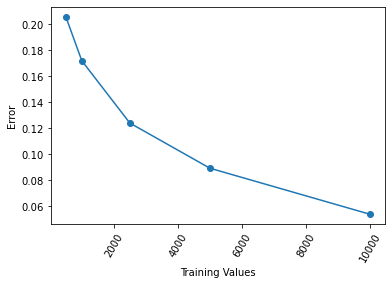

In [89]:
xs=[500,1000,2500,5000,10000]
y = [error_500,error_1000,error_2500,error_5000,error_10000]
plt.scatter(xs,y)
plt.plot(xs,y)
plt.ylabel('Error')
plt.xlabel('Training Values')
plt.xticks(rotation=60)
plt.show()

#### How does the classification error change with number of training example?
The classification error decreases with the increase in the number of training example.

### Classification report of 10000 value

In [90]:
print(metrics.confusion_matrix(y_testMnist10000, ys_predict_MNIST10000))

[[ 971    1    1    0    0    1    4    1    1    0]
 [   0 1130    1    2    0    0    2    0    0    0]
 [  15   14  960    9    1    1    4   23    5    0]
 [   1    1    4  945    1   23    3   12    9   11]
 [   0   11    0    0  915    0    8    6    2   40]
 [   8    4    0   28    3  828   10    2    2    7]
 [   9    3    0    0    3    4  938    0    1    0]
 [   0   26    8    1    4    1    0  971    1   15]
 [   9    5    6   32    4   21    7    8  863   19]
 [   6    6    3    7   20    4    1   17    4  941]]
